# COMP578 Data Mining Spring 2017
## Assignment 4

In this assignment, you will continue to work with the [Mammographic Mass Data Set](http://archive.ics.uci.edu/ml/datasets/Mammographic+Mass) from the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/).

The last column, Severity, in that set is the classification of the tumor: benign=0 or malignant=1.

Here is a quote from the description:
<p style="width: 90%;
    background-color: #EEEEEE;
    color: #5555AA;
    padding: 25px;
    margin: 1em;
    align: center;
    line-height: 100%;"> Each instance has an associated BI-RADS assessment ranging from 1 (definitely benign)
    to 5 (highly suggestive of malignancy) assigned in a double-review process by
    physicians. Assuming that all cases with BI-RADS assessments greater or equal
    a given value (varying from 1 to 5), are malignant and the other cases benign,
    sensitivities and associated specificities can be calculated. These can be an
    indication of how well a CAD system performs compared to the radiologists.</p>

In this assignment, you are to evaluate the use a number of techniques to estimate the severity based on the four predictors:
* Age
* Shape
* Margin
* Density

To achieve that, you will compute evaluation parameters similar to shown in the lab for this block.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
import sklearn.linear_model as skl_lm
import sklearn.discriminant_analysis
import sklearn.preprocessing
import sklearn.neighbors
import sklearn.metrics

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
url_data = "http://archive.ics.uci.edu/ml/machine-learning-databases/mammographic-masses/mammographic_masses.data"

## Columns: BI-RADS Assessment, Age, Shape, Margin, Density, Severity
names = ['BIRADS', 'Age', 'Shape','Margin','Density','Severity']
data = pd.read_csv(url_data, header=None, names=names, na_values='?')
data = data.interpolate(method='linear', axis=0, inplace=False)
data = data.drop('BIRADS',1)

In [3]:
## Define method to build model using various fits, then plot the confusion matrix.

def buildmodels(modeltype,data,pred,printoutput,errorplots):
        
    X_train = data[pred].values.reshape(-1,1)
    y = data['Severity']
    fit = modeltype.fit(X_train,y)
    
    X_test = np.arange(data[pred].min(), data[pred].max()).reshape(-1,1)
    y_pred = modeltype.fit(X_train,y).predict(X_train)
    
    cm = pd.DataFrame({'True Severity': y, 'Predicted Severity': y_pred})
    cm = cm.replace(to_replace={0:'Benign', 1:'Malignant'})
    cm_display = cm.groupby(['Predicted Severity','True Severity']).size().unstack('True Severity')
    class_rep = sklearn.metrics.classification_report(y, y_pred, digits=3)
    
    if printoutput == True:
        print('===================================================================================================')
        print('PREDICTOR: [' + pred + ']')

        print(cm_display)
        print()

        print('CLASSIFICATION REPORT // 0 = Benign, 1 = Malignant')
        print(class_rep)

        plot_confusion_matrix(y,y_pred,pred)
    
    if errorplots == True:
        cm_error = cm_display.divide(cm_display.sum())
        
        fig1 = plt.figure()
        ax1 = cm_error.boxplot
        plt.show()
        
        '''print('test error')
        fig = plt.figure()
        ax = fig.add_subplot(111)
        sns.boxplot('Predicted Severity', 'True Severity', data=cm_display, orient='v', ax=ax)
        plt.show()'''

def plot_confusion_matrix(y,y_pred,pred):
    cm_pl = sklearn.metrics.confusion_matrix(y,y_pred)
    labels = ['Benign','Malignant']
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    bar = ax.matshow(cm_pl, cmap = plt.cm.Blues)
    
    plt.title('CONFUSION MATRIX FOR [' + pred + ']')
    fig.colorbar(bar)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    

### Task 1
##### 10 points

In this task:
* use the logistic regression to build the predictive model,
* compute the parameters (true positives + false positives + precision, the classification_report) that will allow you to make comparisons to other models, and
* plot the confusion matrix.

MODELS USING LOGISTIC REGRESSION
PREDICTOR: [Age]
True Severity       Benign  Malignant
Predicted Severity                   
Benign                 368        166
Malignant              148        279

CLASSIFICATION REPORT // 0 = Benign, 1 = Malignant
             precision    recall  f1-score   support

          0      0.689     0.713     0.701       516
          1      0.653     0.627     0.640       445

avg / total      0.673     0.673     0.673       961



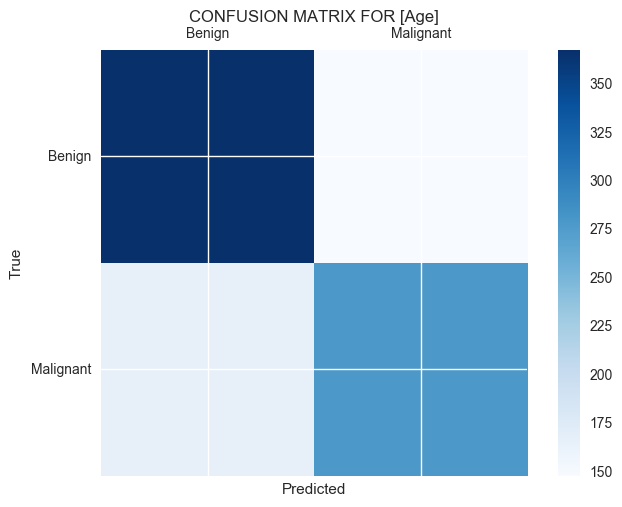

PREDICTOR: [Shape]
True Severity       Benign  Malignant
Predicted Severity                   
Benign                 374         81
Malignant              142        364

CLASSIFICATION REPORT // 0 = Benign, 1 = Malignant
             precision    recall  f1-score   support

          0      0.822     0.725     0.770       516
          1      0.719     0.818     0.766       445

avg / total      0.774     0.768     0.768       961



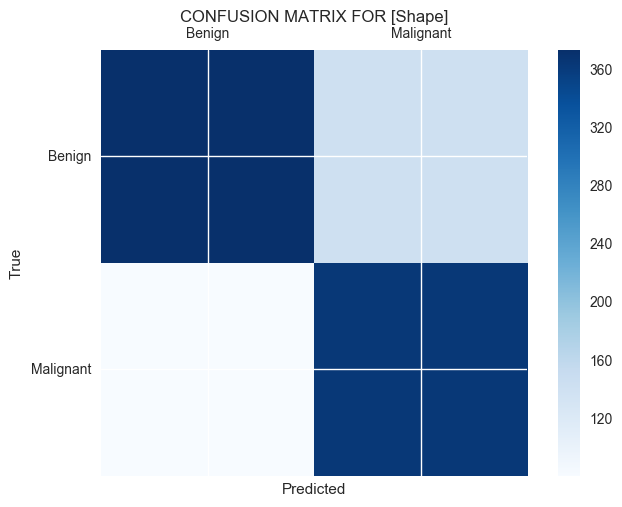

PREDICTOR: [Margin]
True Severity       Benign  Malignant
Predicted Severity                   
Benign                 394        136
Malignant              122        309

CLASSIFICATION REPORT // 0 = Benign, 1 = Malignant
             precision    recall  f1-score   support

          0      0.743     0.764     0.753       516
          1      0.717     0.694     0.705       445

avg / total      0.731     0.732     0.731       961



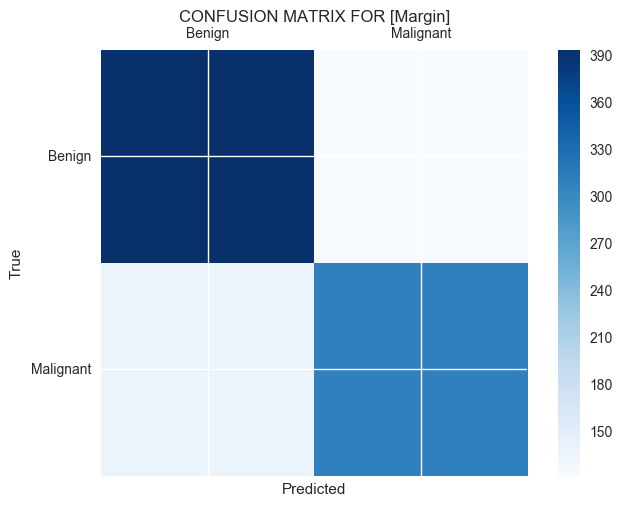

PREDICTOR: [Density]
True Severity       Benign  Malignant
Predicted Severity                   
Benign                 508        440
Malignant                8          5

CLASSIFICATION REPORT // 0 = Benign, 1 = Malignant
             precision    recall  f1-score   support

          0      0.536     0.984     0.694       516
          1      0.385     0.011     0.022       445

avg / total      0.466     0.534     0.383       961



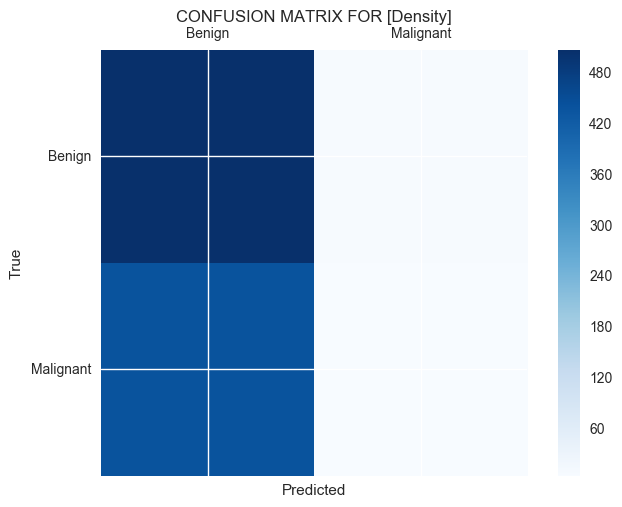

In [4]:
def logisticregression(data,printoutput,errorplots):
    print('MODELS USING LOGISTIC REGRESSION')
    for pred in list(data):
        if pred != 'Severity':
            clf = skl_lm.LogisticRegression(solver='newton-cg')
            buildmodels(clf,data,pred,printoutput,errorplots)
            
logisticregression(data,True,True)

### Task 2
##### 10 points

In this task:
* use the linear discriminant alalysis (LDA) to build the predictive model,
* compute the parameters that will allow you to make comparisons to other models, and
* plot the confusion matrix.

MODELS USING LINEAR DISCRIMINANT ANALYSIS
PREDICTOR: [Age]
True Severity       Benign  Malignant
Predicted Severity                   
Benign                 359        152
Malignant              157        293

CLASSIFICATION REPORT // 0 = Benign, 1 = Malignant
             precision    recall  f1-score   support

          0      0.703     0.696     0.699       516
          1      0.651     0.658     0.655       445

avg / total      0.679     0.678     0.679       961



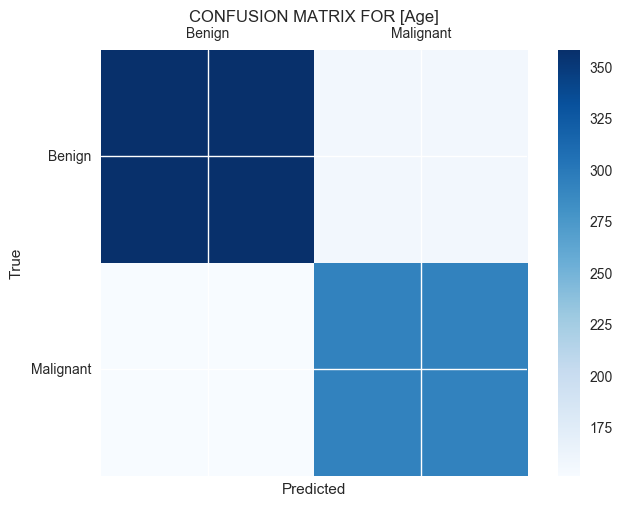

PREDICTOR: [Shape]
True Severity       Benign  Malignant
Predicted Severity                   
Benign                 374         81
Malignant              142        364

CLASSIFICATION REPORT // 0 = Benign, 1 = Malignant
             precision    recall  f1-score   support

          0      0.822     0.725     0.770       516
          1      0.719     0.818     0.766       445

avg / total      0.774     0.768     0.768       961



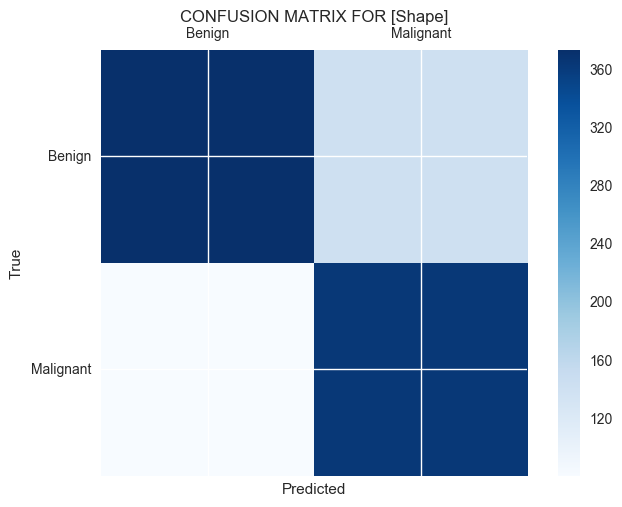

PREDICTOR: [Margin]
True Severity       Benign  Malignant
Predicted Severity                   
Benign                 394        136
Malignant              122        309

CLASSIFICATION REPORT // 0 = Benign, 1 = Malignant
             precision    recall  f1-score   support

          0      0.743     0.764     0.753       516
          1      0.717     0.694     0.705       445

avg / total      0.731     0.732     0.731       961



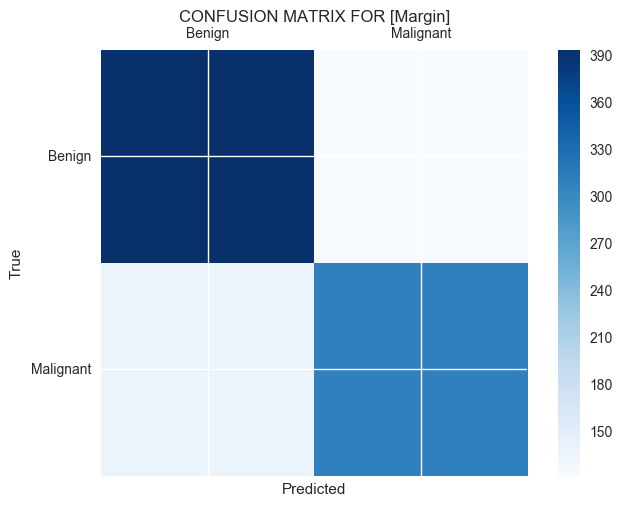

PREDICTOR: [Density]
True Severity       Benign  Malignant
Predicted Severity                   
Benign                 508        440
Malignant                8          5

CLASSIFICATION REPORT // 0 = Benign, 1 = Malignant
             precision    recall  f1-score   support

          0      0.536     0.984     0.694       516
          1      0.385     0.011     0.022       445

avg / total      0.466     0.534     0.383       961



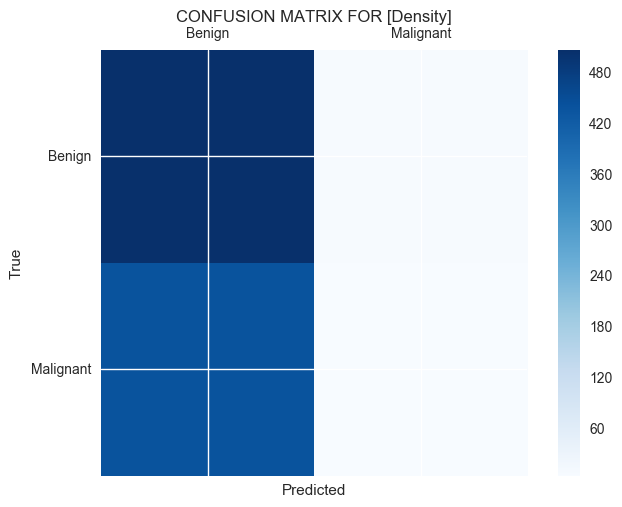

In [5]:
def ld_analysis(data,printoutput,errorplots):
    print('MODELS USING LINEAR DISCRIMINANT ANALYSIS')
    lda = sklearn.discriminant_analysis.LinearDiscriminantAnalysis()
    for pred in list(data):
        if pred != 'Severity':
            buildmodels(lda,data,pred,printoutput,errorplots)
            
ld_analysis(data,True,False)

### Task 3
##### 10 points

In this task:
* use the quadratic discriminant alalysis (LDA) to build the predictive model,
* compute the parameters that will allow you to make comparisons to other models, and
* plot the confusion matrix.

MODELS FOR QUADRATIC DISCRIMINANT ANALYSIS
PREDICTOR: [Age]
True Severity       Benign  Malignant
Predicted Severity                   
Benign                 339        140
Malignant              177        305

CLASSIFICATION REPORT // 0 = Benign, 1 = Malignant
             precision    recall  f1-score   support

          0      0.708     0.657     0.681       516
          1      0.633     0.685     0.658       445

avg / total      0.673     0.670     0.671       961



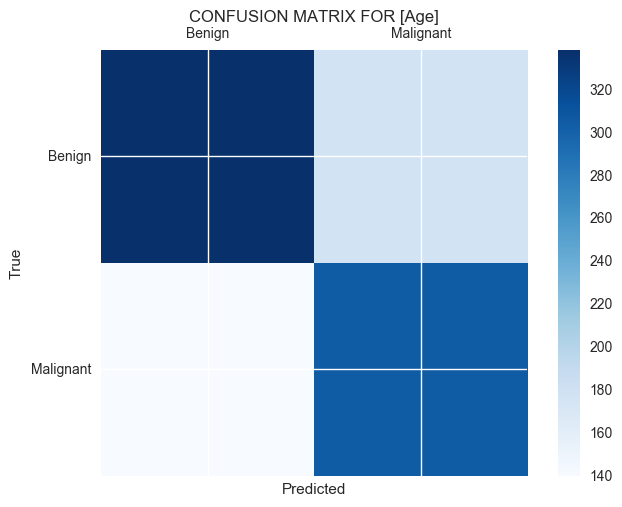

PREDICTOR: [Shape]
True Severity       Benign  Malignant
Predicted Severity                   
Benign                 374         81
Malignant              142        364

CLASSIFICATION REPORT // 0 = Benign, 1 = Malignant
             precision    recall  f1-score   support

          0      0.822     0.725     0.770       516
          1      0.719     0.818     0.766       445

avg / total      0.774     0.768     0.768       961



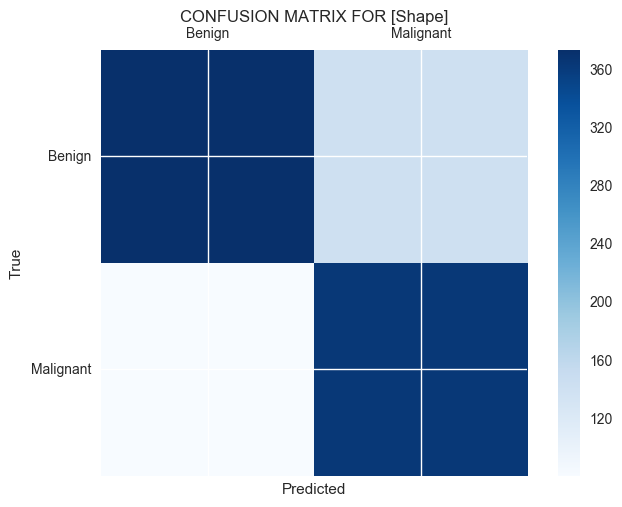

PREDICTOR: [Margin]
True Severity       Benign  Malignant
Predicted Severity                   
Benign                 345         60
Malignant              171        385

CLASSIFICATION REPORT // 0 = Benign, 1 = Malignant
             precision    recall  f1-score   support

          0      0.852     0.669     0.749       516
          1      0.692     0.865     0.769       445

avg / total      0.778     0.760     0.758       961



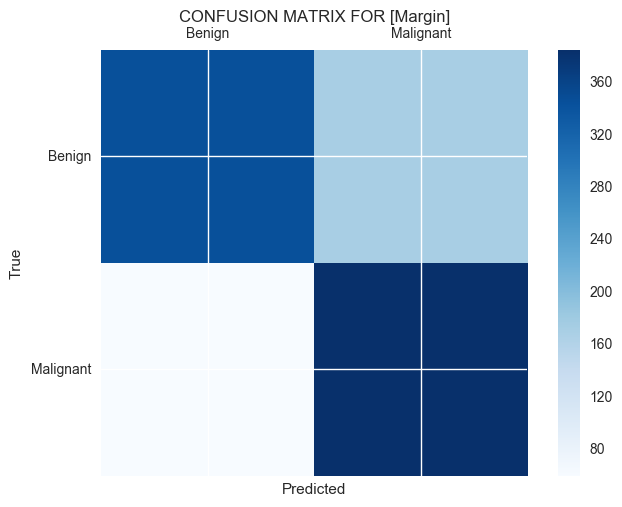

PREDICTOR: [Density]
True Severity       Benign  Malignant
Predicted Severity                   
Benign                  79         36
Malignant              437        409

CLASSIFICATION REPORT // 0 = Benign, 1 = Malignant
             precision    recall  f1-score   support

          0      0.687     0.153     0.250       516
          1      0.483     0.919     0.634       445

avg / total      0.593     0.508     0.428       961



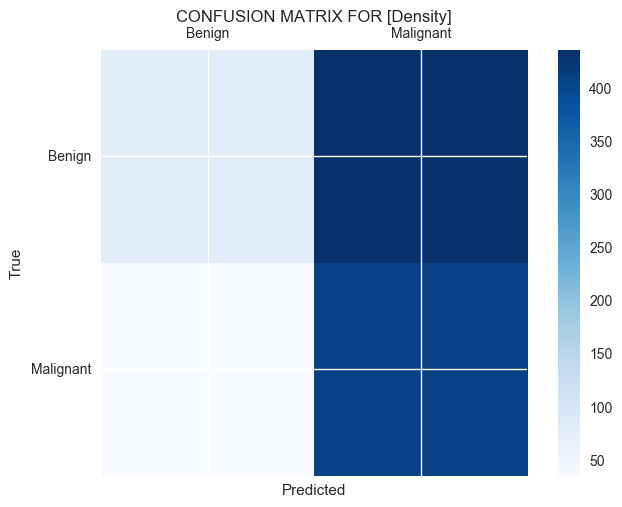

In [6]:
def qd_analysis(data,printoutput,errorplots):
    qda = sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis()
    print('MODELS FOR QUADRATIC DISCRIMINANT ANALYSIS')
    for pred in list(data):
        if pred != 'Severity':
            buildmodels(qda,data,pred,printoutput,errorplots)
            
qd_analysis(data,True,False)

### Task 4
##### 10 points

In this task:
* use the k-NN method to build the predictive model,
* compute the parameters that will allow you to make comparisons to other models, and
* plot the confusion matrix.

Do it for $k\in\{1,3,5\}$.

MODELS USING K-NN (K of 1, 3, and 5)
//// K-Nearest Neighbors: 1 Neighbor(s)
PREDICTOR: [Age]
True Severity       Benign  Malignant
Predicted Severity                   
Benign                 335        194
Malignant              181        251

CLASSIFICATION REPORT // 0 = Benign, 1 = Malignant
             precision    recall  f1-score   support

          0      0.633     0.649     0.641       516
          1      0.581     0.564     0.572       445

avg / total      0.609     0.610     0.609       961



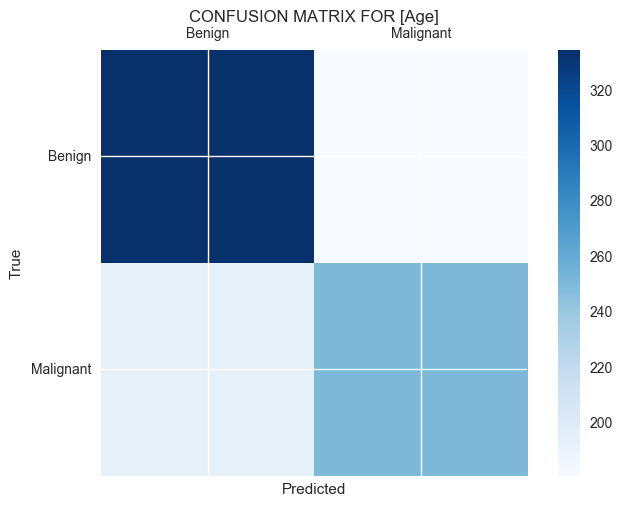

//// K-Nearest Neighbors: 1 Neighbor(s)
PREDICTOR: [Shape]
True Severity       Benign  Malignant
Predicted Severity                   
Benign                 428        128
Malignant               88        317

CLASSIFICATION REPORT // 0 = Benign, 1 = Malignant
             precision    recall  f1-score   support

          0      0.770     0.829     0.799       516
          1      0.783     0.712     0.746       445

avg / total      0.776     0.775     0.774       961



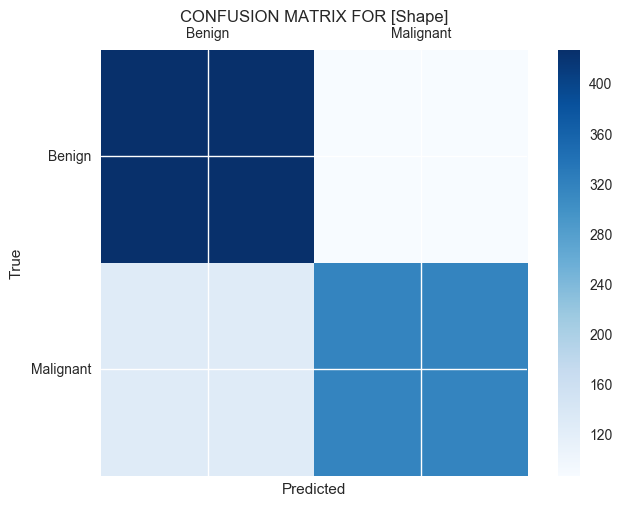

//// K-Nearest Neighbors: 1 Neighbor(s)
PREDICTOR: [Margin]
True Severity       Benign  Malignant
Predicted Severity                   
Benign                 346         59
Malignant              170        386

CLASSIFICATION REPORT // 0 = Benign, 1 = Malignant
             precision    recall  f1-score   support

          0      0.854     0.671     0.751       516
          1      0.694     0.867     0.771       445

avg / total      0.780     0.762     0.761       961



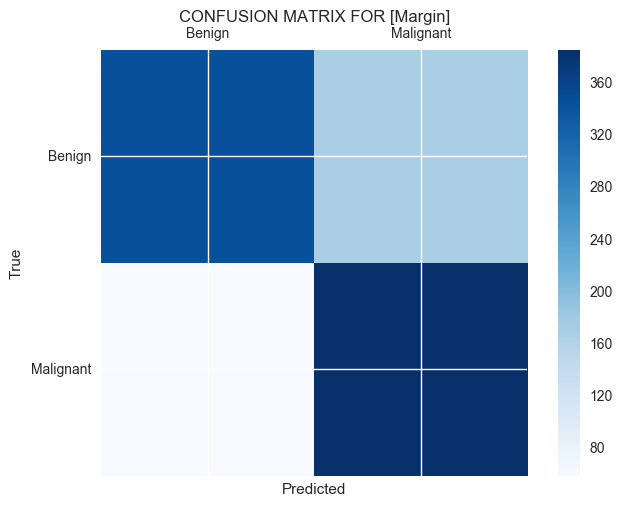

//// K-Nearest Neighbors: 1 Neighbor(s)
PREDICTOR: [Density]
True Severity       Benign  Malignant
Predicted Severity                   
Benign                  72         30
Malignant              444        415

CLASSIFICATION REPORT // 0 = Benign, 1 = Malignant
             precision    recall  f1-score   support

          0      0.706     0.140     0.233       516
          1      0.483     0.933     0.637       445

avg / total      0.603     0.507     0.420       961



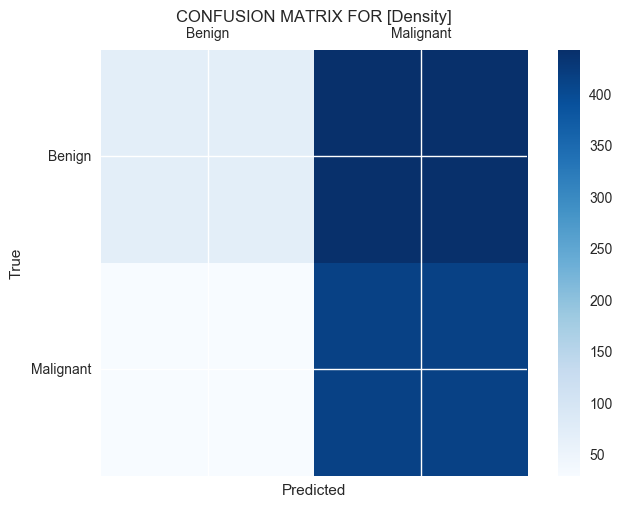

//// K-Nearest Neighbors: 3 Neighbor(s)
PREDICTOR: [Age]
True Severity       Benign  Malignant
Predicted Severity                   
Benign                 354        182
Malignant              162        263

CLASSIFICATION REPORT // 0 = Benign, 1 = Malignant
             precision    recall  f1-score   support

          0      0.660     0.686     0.673       516
          1      0.619     0.591     0.605       445

avg / total      0.641     0.642     0.641       961



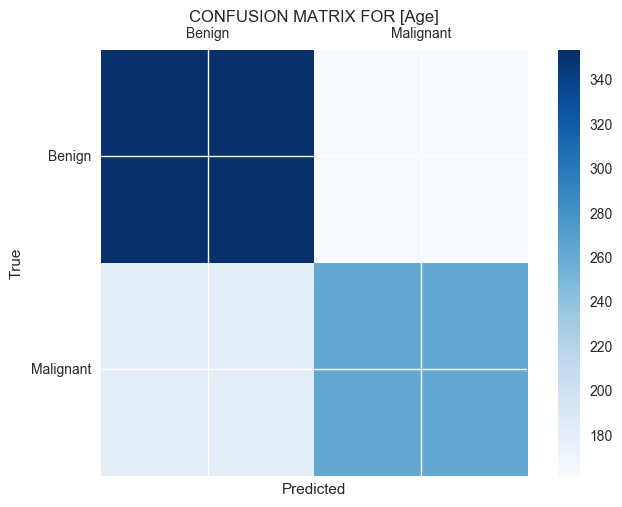

//// K-Nearest Neighbors: 3 Neighbor(s)
PREDICTOR: [Shape]
True Severity       Benign  Malignant
Predicted Severity                   
Benign                 422        123
Malignant               94        322

CLASSIFICATION REPORT // 0 = Benign, 1 = Malignant
             precision    recall  f1-score   support

          0      0.774     0.818     0.795       516
          1      0.774     0.724     0.748       445

avg / total      0.774     0.774     0.773       961



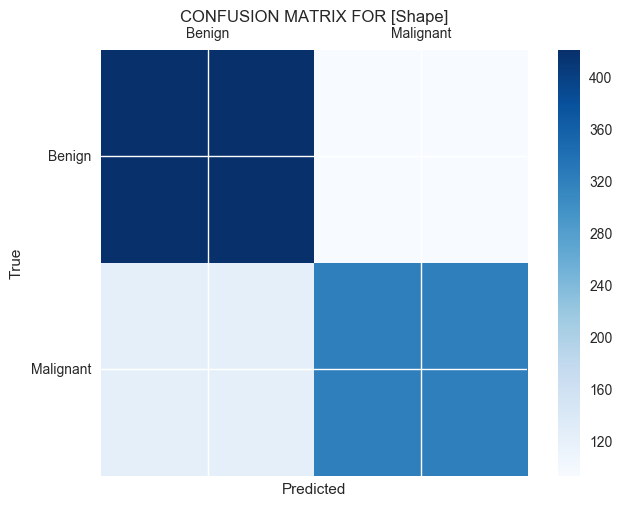

//// K-Nearest Neighbors: 3 Neighbor(s)
PREDICTOR: [Margin]
True Severity       Benign  Malignant
Predicted Severity                   
Benign                 347         61
Malignant              169        384

CLASSIFICATION REPORT // 0 = Benign, 1 = Malignant
             precision    recall  f1-score   support

          0      0.850     0.672     0.751       516
          1      0.694     0.863     0.770       445

avg / total      0.778     0.761     0.760       961



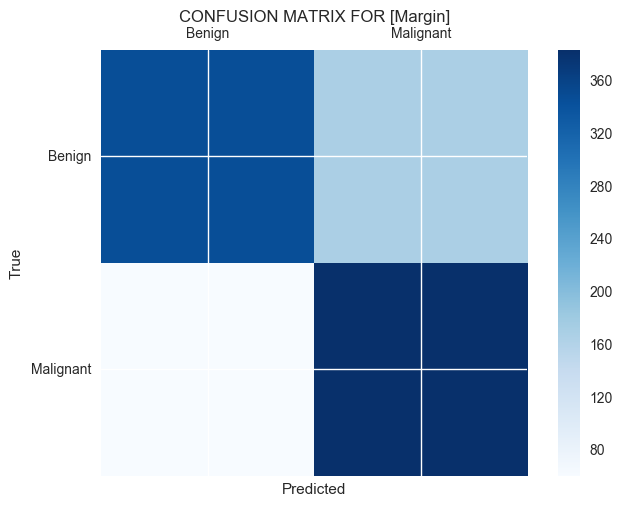

//// K-Nearest Neighbors: 3 Neighbor(s)
PREDICTOR: [Density]
True Severity       Benign  Malignant
Predicted Severity                   
Benign                 506        438
Malignant               10          7

CLASSIFICATION REPORT // 0 = Benign, 1 = Malignant
             precision    recall  f1-score   support

          0      0.536     0.981     0.693       516
          1      0.412     0.016     0.030       445

avg / total      0.478     0.534     0.386       961



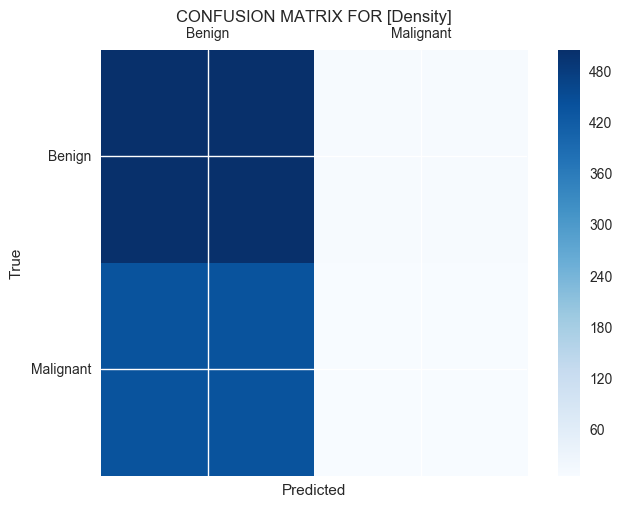

//// K-Nearest Neighbors: 5 Neighbor(s)
PREDICTOR: [Age]
True Severity       Benign  Malignant
Predicted Severity                   
Benign                 373        197
Malignant              143        248

CLASSIFICATION REPORT // 0 = Benign, 1 = Malignant
             precision    recall  f1-score   support

          0      0.654     0.723     0.687       516
          1      0.634     0.557     0.593       445

avg / total      0.645     0.646     0.644       961



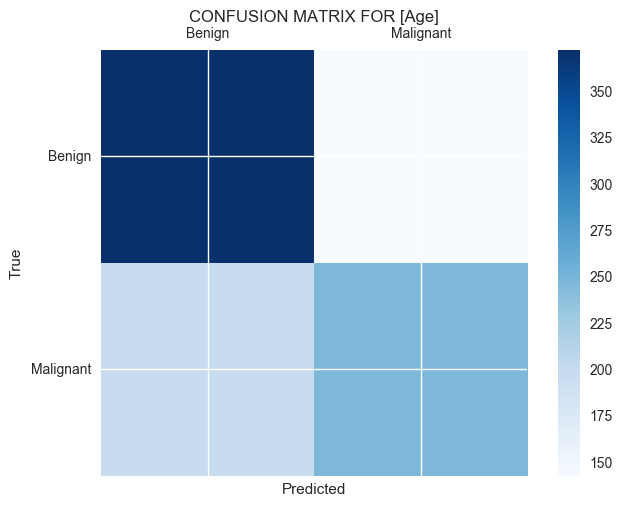

//// K-Nearest Neighbors: 5 Neighbor(s)
PREDICTOR: [Shape]
True Severity       Benign  Malignant
Predicted Severity                   
Benign                 422        123
Malignant               94        322

CLASSIFICATION REPORT // 0 = Benign, 1 = Malignant
             precision    recall  f1-score   support

          0      0.774     0.818     0.795       516
          1      0.774     0.724     0.748       445

avg / total      0.774     0.774     0.773       961



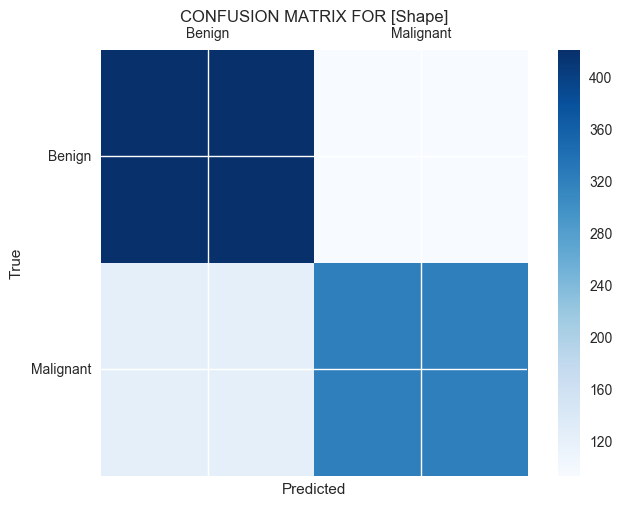

//// K-Nearest Neighbors: 5 Neighbor(s)
PREDICTOR: [Margin]
True Severity       Benign  Malignant
Predicted Severity                   
Benign                 346         61
Malignant              170        384

CLASSIFICATION REPORT // 0 = Benign, 1 = Malignant
             precision    recall  f1-score   support

          0      0.850     0.671     0.750       516
          1      0.693     0.863     0.769       445

avg / total      0.777     0.760     0.759       961



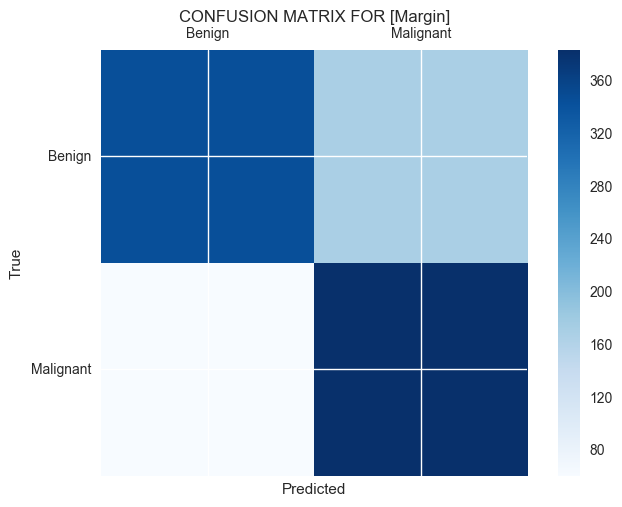

//// K-Nearest Neighbors: 5 Neighbor(s)
PREDICTOR: [Density]
True Severity       Benign  Malignant
Predicted Severity                   
Benign                 504        438
Malignant               12          7

CLASSIFICATION REPORT // 0 = Benign, 1 = Malignant
             precision    recall  f1-score   support

          0      0.535     0.977     0.691       516
          1      0.368     0.016     0.030       445

avg / total      0.458     0.532     0.385       961



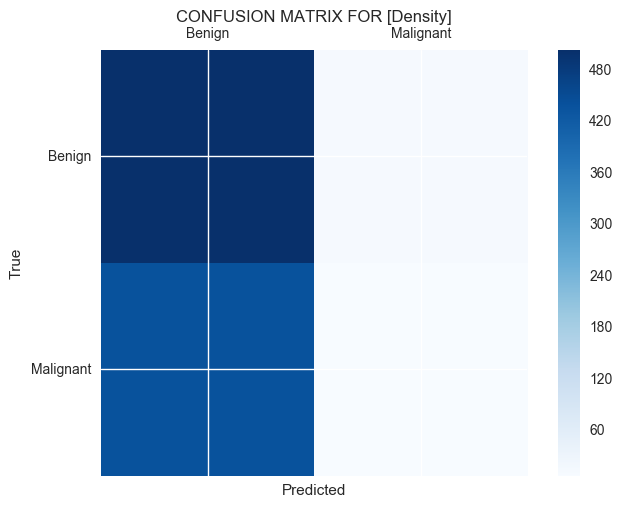

In [7]:
def knn_model(data,printoutput,errorplots):
    print('MODELS USING K-NN (K of 1, 3, and 5)')
    for x in (1,3,5):
        for pred in list(data):
            if pred != 'Severity':
                knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=x)
                print('//// K-Nearest Neighbors: ' + str(x) + ' Neighbor(s)')
                buildmodels(knn,data,pred,printoutput,errorplots)
                
knn_model(data,True,False)

### Task 5
##### 10 points

Generate a figure that illustrates the performance of each of the models using boxplots that show error rate for each of the models. 

In [8]:
def buildmodels_t5(modeltype,train,test,pred):
        
    X_train = train[pred].values.reshape(-1,1)
    y = train['Severity']
    fit = modeltype.fit(X_train,y)
    
    X_test = np.arange(test[pred].min(), test[pred].max()).reshape(-1,1)
    y_pred = modeltype.fit(X_train,y).predict(X_train)
    
    precision_score = sklearn.metrics.precision_score(y, y_pred)
    error_rate = 1 - precision_score

    return error_rate
        
def train_test_samp(data,pred):
    train_randsamp = data.sample(frac=0.8)
    test_randsamp = data.sample(frac=0.2)
    
    return (train_randsamp, test_randsamp)

def error_boxplot(prec_data,label_list):
    fig = plt.figure(figsize=(9,16))
    ax = fig.add_subplot(111)
    ax.boxplot(prec_data)
    plt.setp(ax,xticklabels=label_list,xlabel='PREDICTORS',ylabel='ERROR RATE (1 - precision)')
    plt.show()

In [9]:
clf = skl_lm.LogisticRegression(solver='newton-cg')
lda = sklearn.discriminant_analysis.LinearDiscriminantAnalysis()
qda = sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis()
knn1 = sklearn.neighbors.KNeighborsClassifier(n_neighbors=1)
knn3 = sklearn.neighbors.KNeighborsClassifier(n_neighbors=3)
knn5 = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5)

model_dict = {clf:'Logistic Regression',
             lda:'Linear Discriminant Analysis',
             qda:'Quadratic Discriminant Analysis',
             knn1:'K-Nearest Neighbors (1)',
             knn3:'K-Nearest Neighbors (3)',
             knn5:'K-Nearest Neighbors (5)'}

ERROR BOXPLOTS FOR: K-Nearest Neighbors (1)


/home/omar/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


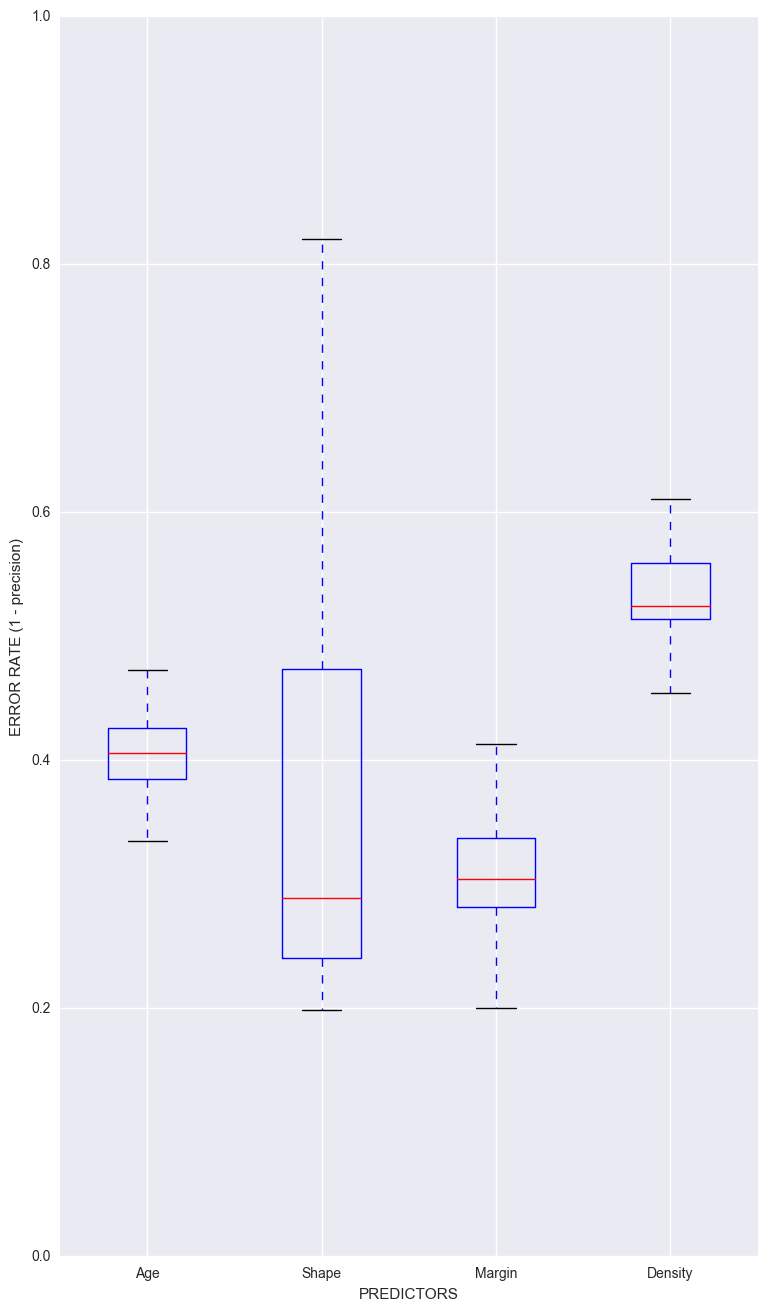

ERROR BOXPLOTS FOR: Logistic Regression


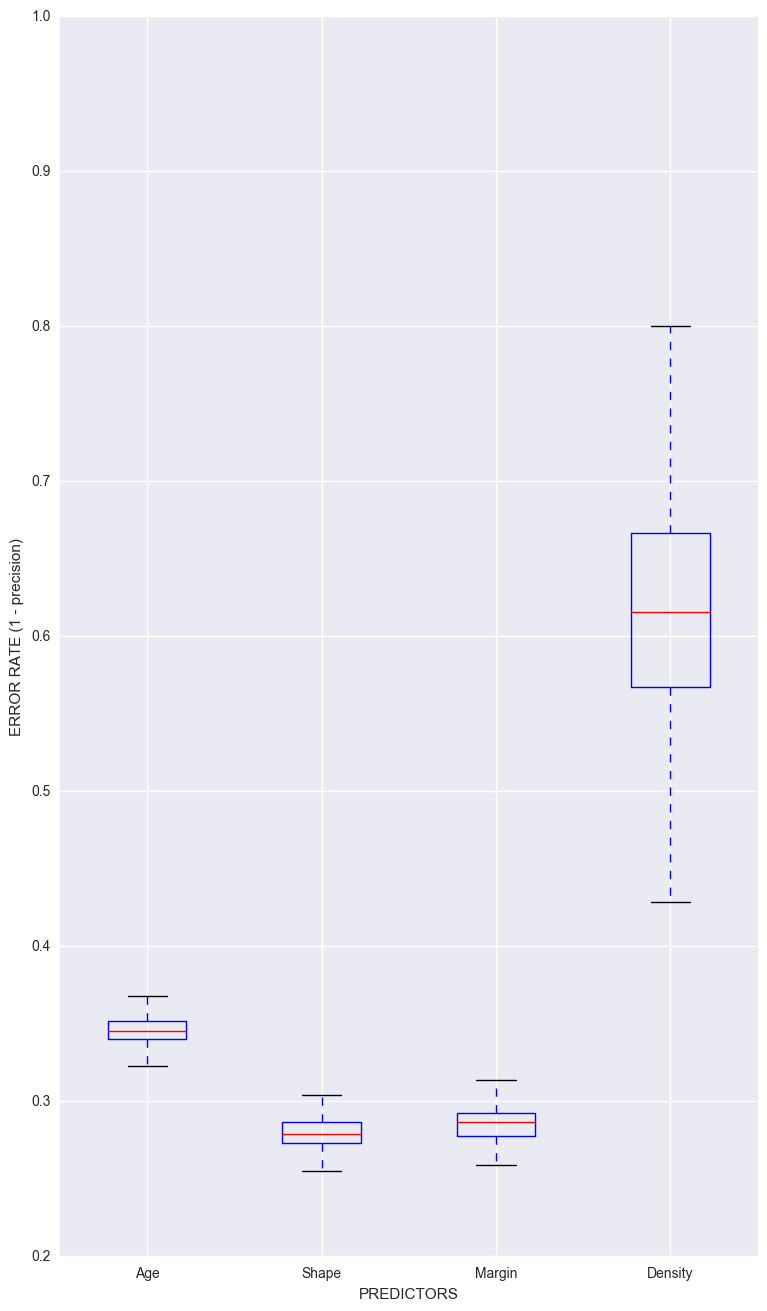

ERROR BOXPLOTS FOR: Linear Discriminant Analysis


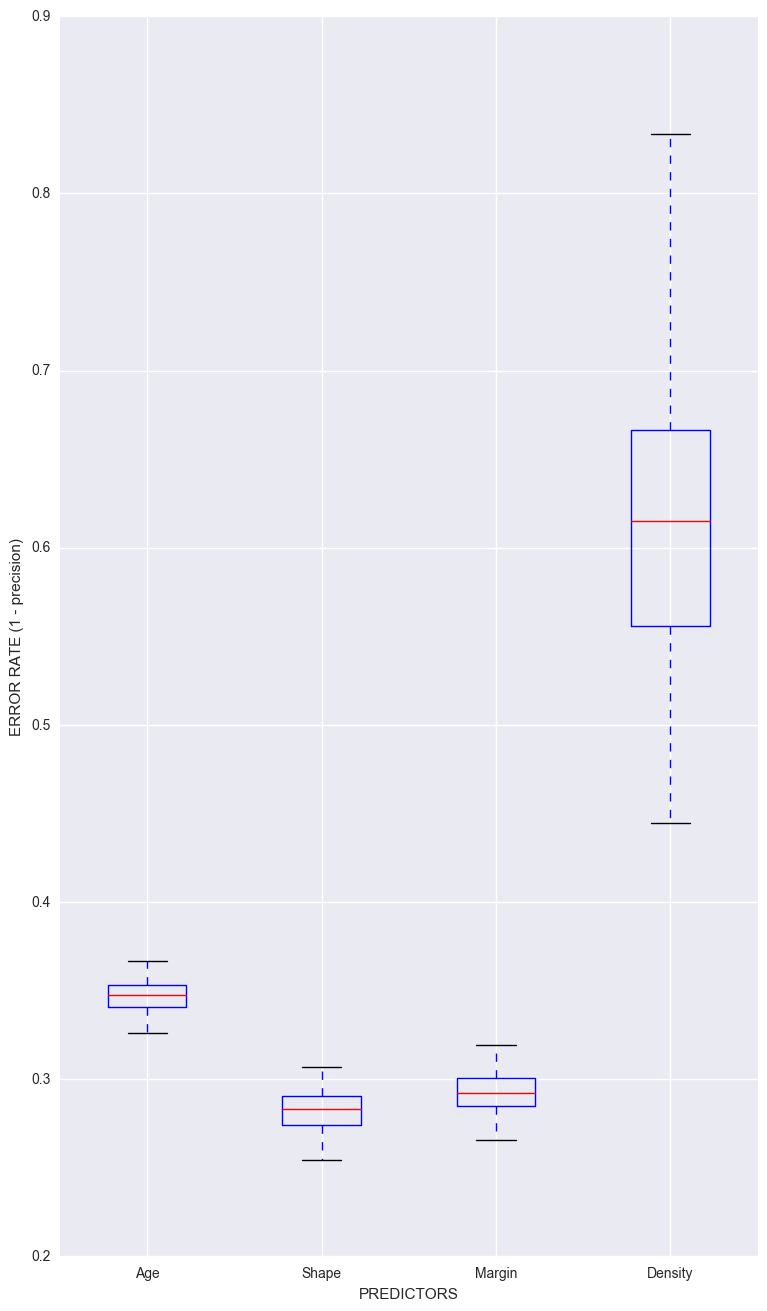

ERROR BOXPLOTS FOR: K-Nearest Neighbors (3)


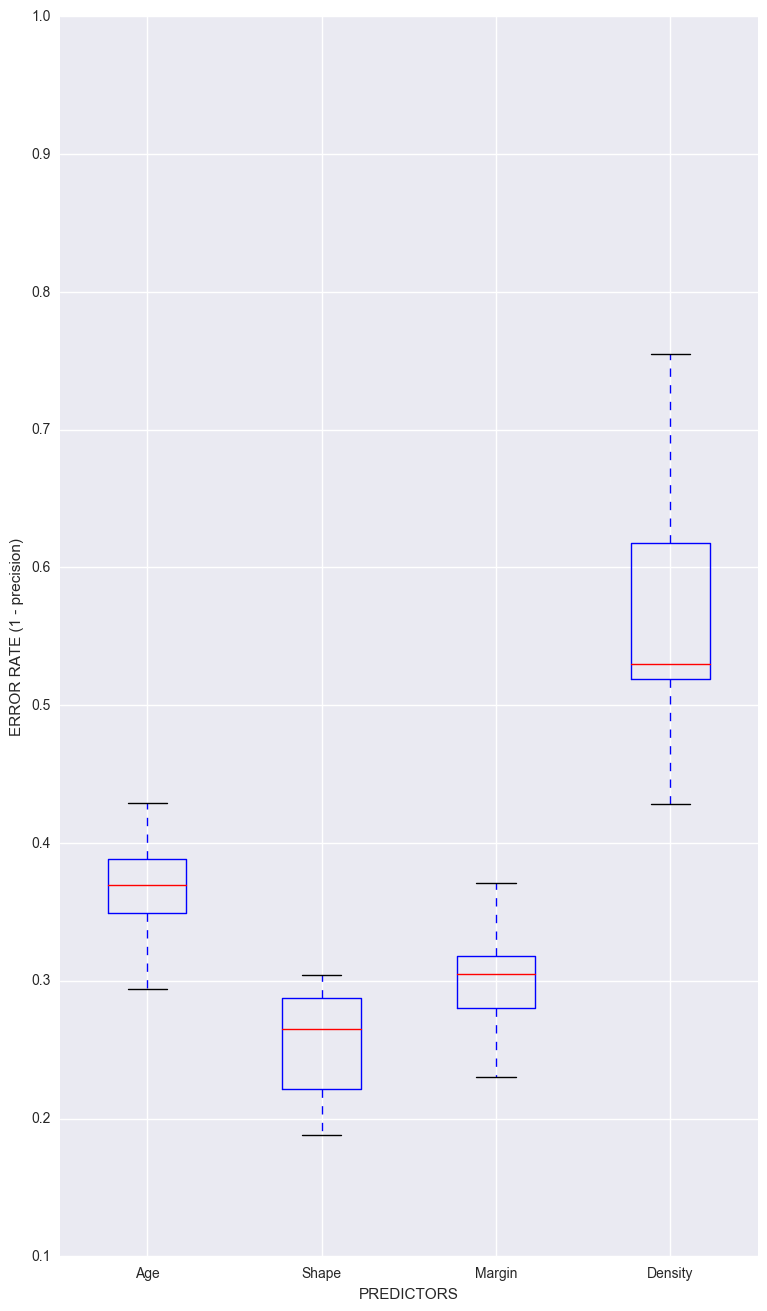

ERROR BOXPLOTS FOR: Quadratic Discriminant Analysis


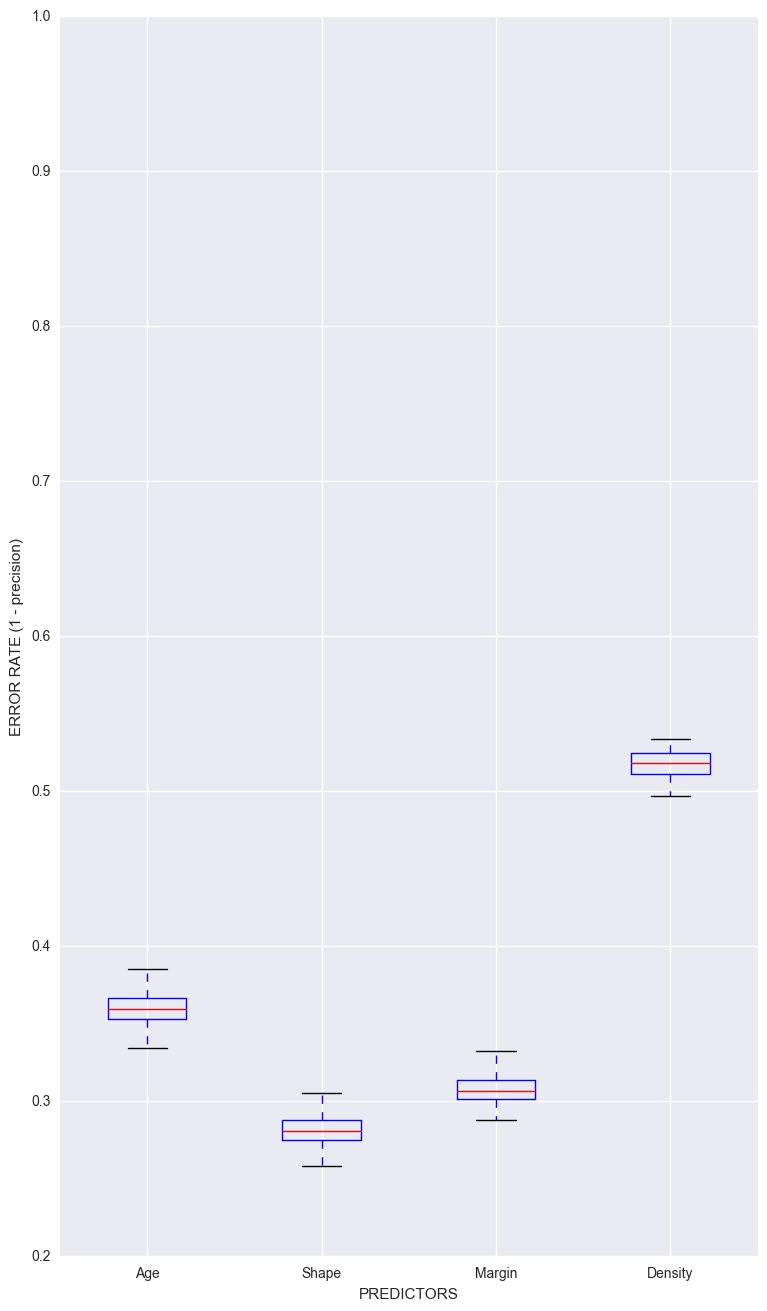

ERROR BOXPLOTS FOR: K-Nearest Neighbors (5)


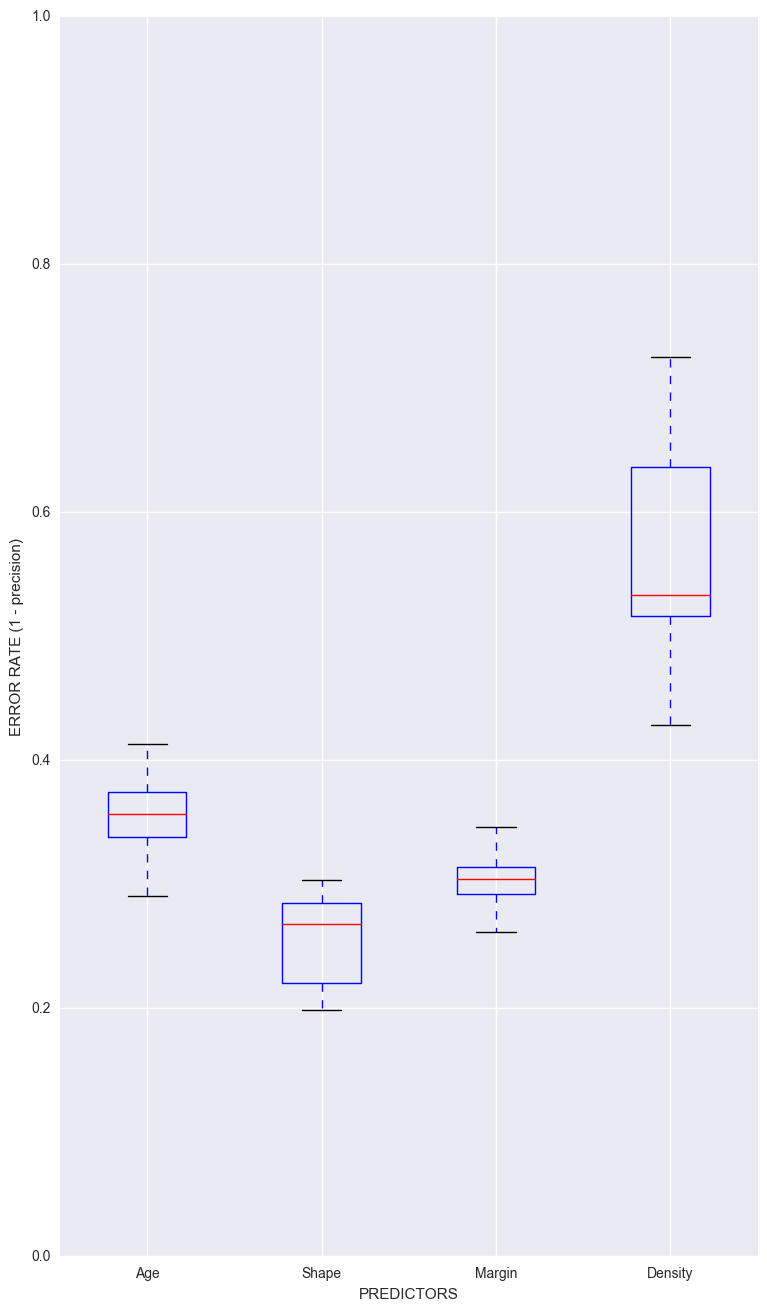

In [10]:
for key in model_dict:
    print('ERROR BOXPLOTS FOR: ' + str(model_dict[key]))
    print('==============================================================')
    print('==============================================================')
    
    err_plot_all = []
    label_list = []
    
    for pred in list(data):
        label_list.append(pred)
        if pred != 'Severity':
            collect_error = [] #container for error scores
            for x in range (0,200):
                train_data, test_data = train_test_samp(data,pred)
                score = buildmodels_t5(key,train_data,test_data,pred)
                collect_error.append(score)
        #add list of error scores to a new list. This will be the data for each individual boxplot        
        err_plot_all.append(collect_error) 
    
    err_plot_all = err_plot_all[0:-1] # last plot is duplicated for some reason
    error_boxplot(err_plot_all, label_list)
